■ 딥러닝 수업
    
    인공지능의 눈? cnn
    
        사진 속에 사람, 동물 등을 구별할 수 있다.
        
        다음 카카오 로드뷰에 사람 얼굴이나 차 번호등을 개인정보 보호법상 반드시 모자이크 처리를 해야하는데 이것이 사람이 일일이 할 수 없다.

    
    데이터를 분석하는 목적?
        
        1. 회사에 돈을 벌어준다.
        2. 의료데이터 분석 -> 환자를 살린다.

■ 목차
====


**1장. 딥러닝에 필요한 파이썬 기본 문법**

2장. 퍼셉트론 ( 신경망의 하나의 세포를 컴퓨터로 구현 )

3장. 신경망 ( 신경망 활성화 함수, 3층 신경망 생성 )

4장. 신경망 학습 ( 손실(오차) 함수, 수치 미분, 경사하강법, 학습 알고리즘 구현 )

5장. 오차 역전파 ( 계산 그래프, 연쇄법칙, 역전파, 단순한 계층 구현 )

6장. 신경망을 학습시키는 여러 기술들 소개 ( 경사하강법의 종류, 배치 정규화, 드롭아웃 )

7장. CNN ( 합성곱 신경망: 이미지를 분류할 수 있는 신경망 구현 )

**8장. 딥러닝의 역사**

9장. 텐서플로우를 이용해서 신경망 구현

10장. 강화학습


실습
1. 폐결절 사진 vs 정상 폐사진 구별 --> data 있음
    
    --> segmentation으로 mri 사진 분류
    
2. 제조업에서 만드는 제품들의 불량 여부 확인
    
    스노우 보드: 정상 스노우 보드 vs 기스가 있는 스노우 보드
    
    옷감 ( 천 ) : 정상 옷감 vs 기스가 있는 옷감

In [4]:
# 문제1. 아래의 행렬을 numpy로 만드시오
import numpy as np

a = np.array([[1,2],[3,4]])

a

array([[1, 2],
       [3, 4]])

In [5]:
# 문제2. 위의 a 행렬의 각 요소를 5를 더한 값을 출력하시오

a += 5  # broadcast

a

array([[6, 7],
       [8, 9]])

#### broadcast
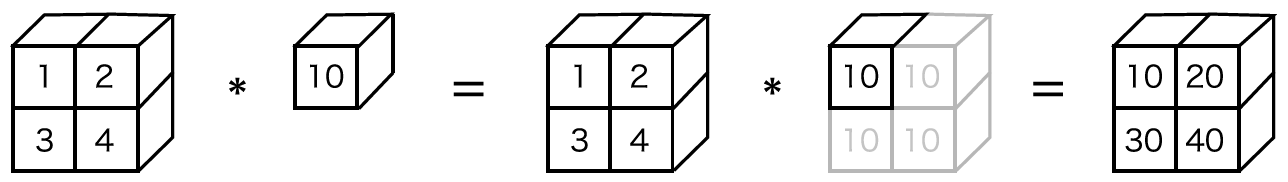

In [8]:
# 문제3. 아래의 배열의 원소들의 평균값을 출력하시오
import numpy as np

a = np.array([1,2,4,5,5,7,10,13,18,21])

print(np.mean(a))

# 참고
print(np.median(a))
print(np.max(a))
print(np.min(a))
print(np.std(a))   # 표준편차
print(np.var(a))

8.6
6.0
21
1
6.43739077577
41.44


In [9]:
# 문제4. 아래의 행렬식을 numpy로 구현하시오
# 1 3 7      0 0 5
#        +         =
# 1 0 0     7 5 0 

a = np.array([[1,3,7],[1,0,0]])
b = np.array([[0,0,5],[7,5,0]])

print(a+b)

[[ 1  3 12]
 [ 8  5  0]]


In [12]:
# 문제5. 아래의 그림의 브로드 캐스트를 numpy로 구현하시오

a = np.array([[1,2],[3,4]])
b = np.array([10,20])

print(a, "+", b, "=", a+b )

[[1 2]
 [3 4]] + [10 20] = [[11 22]
 [13 24]]


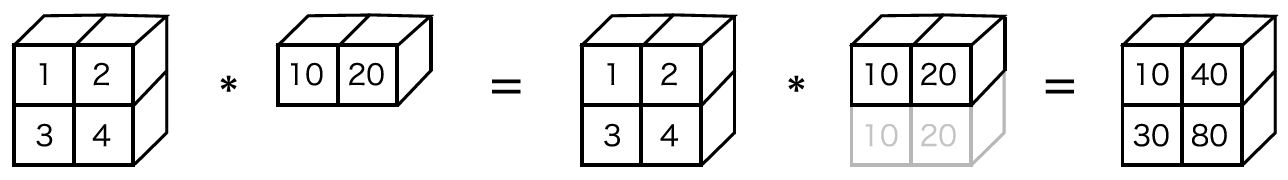

In [29]:
# 문제6. 아래의 행렬식을 numpy로 구현하고 아래의 요소에서 15 이상인 것만 출력하시오

a = np.array([[51,55],[14,19],[0,4]])
# a = a.flatten()  # option -> 1차원 배열로
print(a)
print(np.where(a>=15))
print(a>=15)
print(a[np.where(a>=15)])

[[51 55]
 [14 19]
 [ 0  4]]
(array([0, 0, 1], dtype=int64), array([0, 1, 1], dtype=int64))
[[ True  True]
 [False  True]
 [False False]]
[51 55 19]


In [43]:
# 문제7. 아래의 행렬식을 numpy를 이용하지 말고 구현하고 아래의 요소에서 15이상인 것만 출력하시오

a = [[51,55],[14,19],[0,4]]

print(a)

# a = [x for b in a for x in b]  # -> 1차원 배열로
# print(a)

# print([x for x in a if x >= 15])

print([x for b in a for x in b if x >= 15])

[[51, 55], [14, 19], [0, 4]]
[51, 55, 19]


In [55]:
# 문제 아래의 행렬합을 numpy를 이용하지 않고 구현하시오

a = [[1,3,7],[1,0,0]]
b = [[0,0,5],[7,5,0]]

print(a,b)

# a = [x for z in a for x in z]

# b = [y for k in b for y in k]

# print([x+y for x,y in zip(a,b)])

c = [[],[]]   # 미리 선언해줘야함

for i, (x, y) in enumerate(zip(a,b)):
    for j in range(len(x)):
        c[i].append(x[j] + y[j])
        
print(c)

[[1, 3, 7], [1, 0, 0]] [[0, 0, 5], [7, 5, 0]]
[[1, 3, 12], [8, 5, 0]]


In [77]:
# 문제9. numpy의 브로드 캐스트를 사용한 연산을 numpy를 이용하지 않은 방법으로 구현하시오

a = [[1,2],[3,4]]
b = [10,20]

print(a,b)

c = [[],[]]

a2 = [x for z in a for x in z]

b = b * (len(a2) - len(b))

# print(a,b)
for i,x in enumerate(a):
    for j in range(len(x)):
        c[i].append(x[j]*b[j])
print(c)

[[1, 2], [3, 4]] [10, 20]
[[10, 40], [30, 80]]


In [104]:
# 문제10. 브로드 캐스트를 numpy를 이용하지 않고 파이썬으로 구현하시오

a = [[1,2],[3,4]]
# b = [10,20,30]
b = [10]
# b = [10,20]
# b = [10,20,30,40,50]

print(a,"*",b, end=' ')

c = [[],[]]

a2 = [x for z in a for x in z]

if len(a2) > len(b):
    if len(a2) - len(b) == 1:
        b = b + [b[0]] # 차이가 홀수일경우 -> 인덱스 0부터 채우기
    elif (len(a2) - len(b)) % 2 ==0:
        b = b * (len(a2) - len(b))
    else:
        b = b * ((len(a2) - len(b))) + [b[0]]

k = 0
for i,x in enumerate(a):
    for j in range(len(x)):
        c[i].append(x[j]*b[k])
        k += 1
        
print("=",c)

[[1, 2], [3, 4]] * [10] = [[10, 20], [30, 40]]


■ matplotlib 사용법

딥러닝 실험에서는 그래프 그리기와 데이터 시각화가 중요하다.

matplotlib은 그래프를 그리기 위한 라이브러리이다.

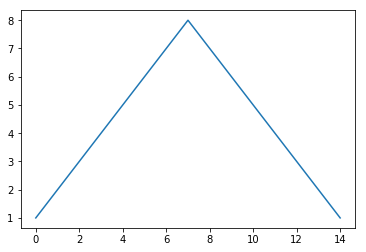

In [107]:
# 예제
import matplotlib.pyplot as plt

# plt.figure()     # 하나의 화면에 여러개의 그래프를 중첩해서 그릴 때 필요
plt.plot([1,2,3,4,5,6,7,8,7,6,5,4,3,2,1])
plt.show()

[  0.00000000e+00   1.00000000e-02   2.00000000e-02 ...,   1.19700000e+01
   1.19800000e+01   1.19900000e+01]


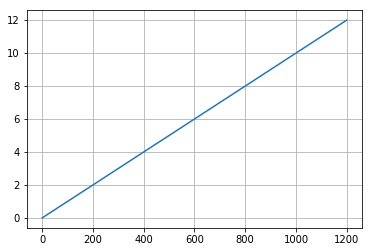

In [110]:
# 문제11.
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0,12,0.01)
print(t)

plt.plot(t)
plt.grid()  # 격자
plt.show()

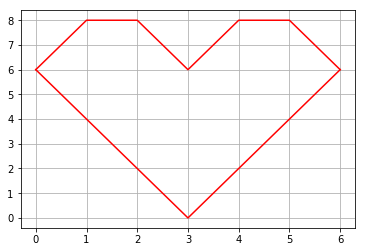

In [111]:
# 문제12.

plt.figure()  # 하나의 화면에 여러개의 그래프를 중첩해서 그릴 때 필요
plt.plot([6, 4, 2, 0, 2, 4, 6], color = 'red')
plt.plot([6, 8, 8, 6, 8, 8, 6], color = 'red')
plt.grid()
plt.show()

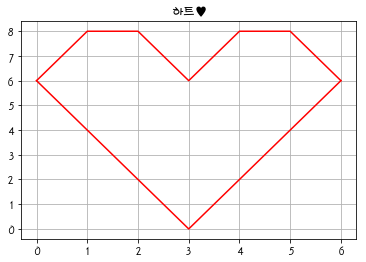

In [113]:
# 문제13. 위의 그래프에 제목을 붙이시오!
import numpy as np
from matplotlib import font_manager, rc
    
# 한글 폰트 설정
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/H2PORM.TTF").get_name()
rc('font', family=font_name)

plt.figure()  # 하나의 화면에 여러개의 그래프를 중첩해서 그릴 때 필요
plt.plot([6, 4, 2, 0, 2, 4, 6], color = 'red')
plt.plot([6, 8, 8, 6, 8, 8, 6], color = 'red')
plt.grid()
plt.title('하트♥')
plt.show()

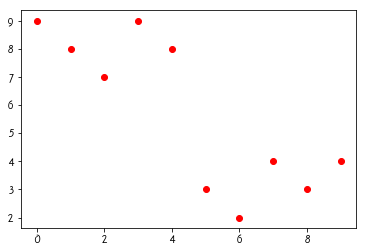

In [117]:
# 문제14. 아래의 numpy 배열로 산포도 그래프를 그리시오

x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

plt.scatter(x,y, color = ("red"))
plt.show()

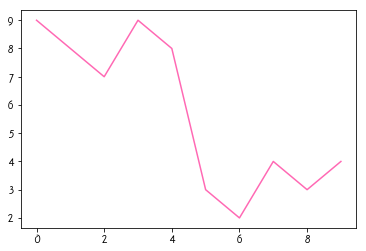

In [120]:
# 문제15. 위의 산포도 그래프를 라인 그래프로 그리시오
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

plt.plot(x,y, color = "Hotpink")
plt.show()

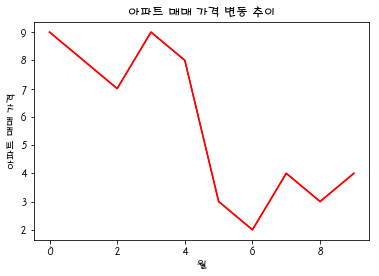

In [123]:
# 문제16. 위의 그래프의 x축의 라벨을 '월'이라고 하고 y축을 "집값"으로 라벨을 붙여서 출력하시오
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

plt.plot(x,y, color = ("red"))
plt.xlabel("월")
plt.ylabel("아파트 매매 가격")
plt.title('아파트 매매 가격 변동 추이')
plt.show()

[[ 2005.  2006.  2007.  2008.  2009.  2010.  2011.  2012.  2013.  2014.]
 [ 2196.  2028.  1802.  1691.  1826.  1798.  1688.  1767.  1965.  1980.]
 [ 1034.   950.  1036.  1127.  1086.  1105.  1199.  1183.  1432.  1870.]
 [  540.   577.   620.   561.   645.   669.   736.   753.   839.  1095.]
 [  530.   525.   507.   543.   711.   865.   837.   986.   954.  1193.]
 [  454.   483.   575.   772.   845.  1291.  1671.  1847.  2287.  3053.]
 [ 5994.  5504.  6148.  6036.  6577.  6689.  6900.  7082.  7708.  9772.]
 [  635.   591.   544.   525.   627.   553.   638.   687.   769.  1272.]]


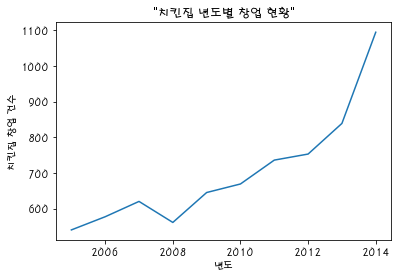

In [137]:
# 문제17. 치킨집 년도별 창업건수 데이터를 가지고 라인 그래프를 그리시오

# unpack=True: csv 파일을 pivot해서 읽어온다.
chi = np.loadtxt("C:\\data\\창업건수.csv", skiprows=1, unpack=True, delimiter=',')   # skiprows=1: numpy모듈의 경우 수치데이터를 다룬다. 컬럼명 제외
# chi2 = np.loadtxt("C:\\data\\창업건수.csv", skiprows=1, delimiter=',')
print(chi)
# print(chi2)

index = chi[0]
# print(index)
plt.plot(index, chi[3])
plt.xlabel('년도')
plt.ylabel('치킨집 창업 건수')
plt.title('"치킨집 년도별 창업 현황"')
plt.show()

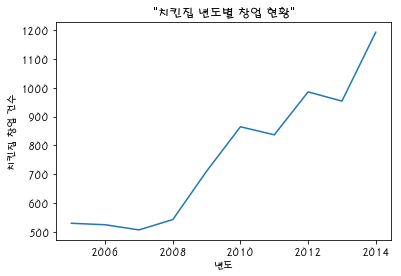

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
미용실,2196,2028,1802,1691,1826,1798,1688,1767,1965,1980
양식집,1034,950,1036,1127,1086,1105,1199,1183,1432,1870
일식집,540,577,620,561,645,669,736,753,839,1095
치킨집,530,525,507,543,711,865,837,986,954,1193
커피음료,454,483,575,772,845,1291,1671,1847,2287,3053
한식음식점,5994,5504,6148,6036,6577,6689,6900,7082,7708,9772
호프간이주점,635,591,544,525,627,553,638,687,769,1272


In [185]:
# 개인적인 생각으로는 pandas를 이용하는 것이 나을 듯..
import pandas as pd

chi = pd.read_csv("창업건수.csv", engine='python')
chi = chi.T
# print(chi.index)
y = chi.loc['치킨집']
x = chi.iloc[0]
# # print(index)
plt.plot(x,y)
plt.xlabel('년도')
plt.ylabel('치킨집 창업 건수')
plt.title('"치킨집 년도별 창업 현황"')
plt.show()

chi

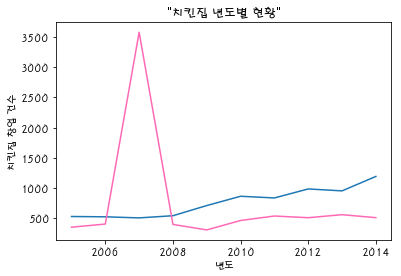

In [197]:
# 문제18. 치킨집 창업 현황과 폐업 편황을 겹치게 해서 출력하시오

chi = pd.read_csv("창업건수.csv", engine='python')
pae = pd.read_csv("폐업건수.csv", engine='python')
chi = chi.T
# print(chi.index)
y = chi.loc['치킨집']
x = chi.iloc[0]

pae['년도'] = pae['Unnamed: 0']
px = pae['년도']
py = pae['치킨집']
# print(px)
plt.figure(figsize=(6,4))
# # # print(index)
plt.plot(x,y)
plt.plot(px,py, color = "Hotpink")
plt.xlabel('년도')
plt.ylabel('치킨집 창업 건수')
plt.title('"치킨집 년도별 현황"')
plt.show()


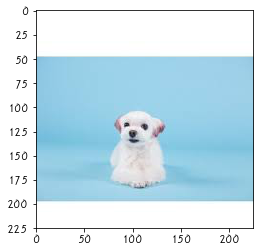

In [200]:
from matplotlib.image import imread

img = imread("C:\\img\\35798.jpg")

plt.imshow(img)
plt.show()